### List of Imports 

In [48]:
from __future__ import print_function, division

In [49]:
import pandas as pd
import numpy as np 
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import scipy
import patsy
import sys
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest



%matplotlib inline 

### Versions 

In [50]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


### Read Data 

In [51]:
with open('../../Data/movies_clean.pickle', 'rb') as f:
    movies_df = pickle.load(f)

In [52]:
movies_df = movies_df[movies_df.DomesticTotalGross < 450]

In [53]:
movies_df.corr().head()

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
Runtime (mins),1.000000,0.436462,0.364324,-0.101400,0.020044,-0.041863,0.123598,0.084092,0.017464,-0.078435,...,0.306093,0.114084,-0.126422,0.117912,0.280904,0.161000,0.149229,0.172026,0.171395,NaN
Opening Weekend Gross ($),0.436462,1.000000,0.940681,-0.095990,0.037548,-0.079470,0.213820,0.120210,0.123371,-0.077877,...,0.637392,0.287437,-0.446533,-0.028207,0.261784,0.145222,0.156606,0.310110,0.292747,NaN
DomesticTotalGross,0.364324,0.940681,1.000000,-0.114171,0.031011,-0.083432,0.158237,0.124316,0.144302,-0.088346,...,0.681552,0.333127,-0.461158,-0.034534,0.240963,0.133181,0.132811,0.231486,0.252776,NaN
Release Month_2,-0.101400,-0.095990,-0.114171,1.000000,-0.115716,-0.080160,-0.098985,-0.103707,-0.118611,-0.089065,...,-0.097627,-0.043271,-0.002879,-0.081692,-0.065088,-0.005025,-0.032580,-0.036474,-0.032580,NaN
Release Month_3,0.020044,0.037548,0.031011,-0.115716,1.000000,-0.092228,-0.113887,-0.119319,-0.136467,-0.102474,...,0.024053,0.010747,0.077225,0.006900,-0.025350,0.074007,0.042275,0.029469,-0.037485,NaN


In [54]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 8 to 207
Data columns (total 34 columns):
Movie Title                  383 non-null object
Runtime (mins)               383 non-null float64
Opening Weekend Gross ($)    383 non-null float64
DomesticTotalGross           383 non-null float64
Release Month_2              383 non-null uint8
Release Month_3              383 non-null uint8
Release Month_4              383 non-null uint8
Release Month_5              383 non-null uint8
Release Month_6              383 non-null uint8
Release Month_7              383 non-null uint8
Release Month_8              383 non-null uint8
Release Month_9              383 non-null uint8
Release Month_10             383 non-null uint8
Release Month_11             383 non-null uint8
Release Month_12             383 non-null uint8
MPAA_PG/PG-13                383 non-null uint8
MPAA_R                       383 non-null uint8
MPAA_Unrated                 383 non-null uint8
Genre_3D                

In [55]:
movies_df.describe().head(2)

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.0
mean,107.070496,31.383214,97.815316,0.091384,0.117493,0.060052,0.088773,0.096606,0.122715,0.073107,...,0.133159,0.018277,0.203655,0.148825,0.086162,0.031332,0.010444,0.013055,0.010444,0.0


In [56]:
movies_df.shape

(383, 34)

### Dataset Standardization - removes the mean and scaling to unit variance 
L1 and L2 regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [57]:
not_y = movies_df.loc[:, movies_df.columns != 'DomesticTotalGross'] 
x = not_y.loc[:, not_y.columns != 'Movie Title']
y = movies_df.DomesticTotalGross

In [58]:
print('Model Features: ', x.columns)

Model Features:  Index(['Runtime (mins)', 'Opening Weekend Gross ($)', 'Release Month_2',
       'Release Month_3', 'Release Month_4', 'Release Month_5',
       'Release Month_6', 'Release Month_7', 'Release Month_8',
       'Release Month_9', 'Release Month_10', 'Release Month_11',
       'Release Month_12', 'MPAA_PG/PG-13', 'MPAA_R', 'MPAA_Unrated',
       'Genre_3D', 'Prod_Budget_Medium', 'Prod_Budget_Small',
       'Release_Limited', 'Release_Wild', 'Director_Above_10',
       'Director_Above_20', 'Director_Above_40', 'Director_Below_1',
       'Actors Rank_2', 'Actors Rank_3', 'Actors Rank_4', 'Actors Rank_5',
       'Actors Rank_6', 'Actors Rank_7', 'Actors Rank_8'],
      dtype='object')


In [59]:
print('Dimensionality of features:', x.shape)
print('Dimensionality of target:', (len(y),))

Dimensionality of features: (383, 32)
Dimensionality of target: (383,)


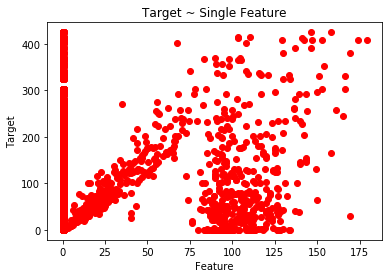

In [60]:
plt.plot(x, y, 'ro');
plt.title('Target ~ Single Feature')
plt.xlabel('Feature')
plt.ylabel('Target');

In [61]:
ssX = StandardScaler()
not_Y = movies_df[[x for x in movies_df.columns if x != 'DomesticTotalGross']] 
X = not_Y[[x for x in not_y.columns if x != 'Movie Title']]
Y = movies_df.DomesticTotalGross

### Train-Test Split - 10% of Data as Holdout for Validation

In [62]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [63]:
X_tr = ssX.fit_transform(X_train)
X_val = ssX.transform(X_val)

In [64]:
print('Dimensionality of training features:', X_train.shape)
print('Dimensionality of training target:', Y_train.shape)

Dimensionality of training features: (344, 32)
Dimensionality of training target: (344,)


##### Regression Statistics
R2: square of the correlation coefficient and represents the estimated percentage of the variance in our target variable Y that can be explained by our regression model. Adjusted R2 also penalizes for things such as large coefficients and extra variables to try and limit overfitting so it is often a better measure of model efficacy.

P(|t|) measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.
Putting it all together, the final column returns a 95% Confidence Interval for the value of each coefficient.

### Linear Regression Model 1: SkLearn 

In [65]:
df_train = pd.DataFrame(X_tr)
df_train.columns = [x.columns]

In [66]:
def sklearn_lr(feature,cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    lr = LinearRegression()
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    lr.fit(x_train, Y_train)
    score_ = cross_val_score(lr, x_train, Y_train, cv = cv, scoring = scoring)
    score_mean = score_.mean()
    intercept_ = lr.intercept_
    coef_ = lr.coef_
    print('|Mean score|: ', score_mean
          , '\n', 'Intercept|: ',intercept_, '\n', '|Coefs|: ', coef_)
    return lr 

In [67]:
sk_m1 = sklearn_lr(['Opening Weekend Gross ($)'])

|Mean score|:  -22.0746324901 
 Intercept|:  96.5934019665 
 |Coefs|:  [ 93.10848328]


In [68]:
sk_m2 = sklearn_lr(['Opening Weekend Gross ($)'
                    ,'Genre_3D','MPAA_R','Prod_Budget_Medium','Director_Above_40'
                    ,'Release Month_12','Release_Wild','Release Month_11'
                    ,'Director_Above_10','Director_Above_20'])

|Mean score|:  -17.3544866329 
 Intercept|:  96.5934019665 
 |Coefs|:  [ 59.63759475   8.29220832  -3.23518865   1.49071033  17.14130803
   3.46086415  -1.02113407   1.9764733   17.19049676  32.39808077]


In [69]:
sk_m3 = sklearn_lr(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Mean score|:  -17.021253191 
 Intercept|:  96.5934019665 
 |Coefs|:  [  6.15911556e+01   8.18267334e+00   1.75988055e+01   3.57778351e+00
   2.62665091e+00  -3.55271368e-15   1.71213057e+01   3.22910329e+01
  -4.42513801e+00]


### Linear Regression Model 2 - Lasso Regression (L1)

In [70]:
# def adj_r2(rsquare, num_data, num_features):
#     temp = (1-rsquare)*(num_data-1)
#     temp = temp/(num_data-num_features-1)
#     temp = 1 - temp
#     return temp

In [71]:
def lasso_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Lasso(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_lasso = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_lasso.intercept_
    best_coefs = best_lasso.coef_
    print('|Best Lasso|: ',best_lasso
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)
    return best_lasso

In [72]:
# 5-fold CV, scoring with negative MAE, 1 feature: 
best_lasso_I1 = lasso_modeling(['Opening Weekend Gross ($)'])

|Best Lasso|:  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -22.0712589155 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 93.10847328]


##### _Out of all models w/ Lasso(w/ different combination of features) tested, the one below returns the hightst R^2._

In [73]:
best_lasso_I2 = lasso_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best Lasso|:  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -17.0177495352 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 61.59117547   8.18266733  17.59878495   3.57777494   2.62664278   0.
  17.12128478  32.29100491  -4.42512519]


### Linear Regression Model 3 - Ridge Regression (L2)

In [74]:
def ridge_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Ridge(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_ridge = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_ridge.intercept_
    best_coefs = best_ridge.coef_
    print('|Best Ridge|: ',best_ridge
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [75]:
best_ridge_I1 = ridge_modeling(['Opening Weekend Gross ($)'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -22.0712578455 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 93.10848058]


##### _Out of all models w/ L2 (w/ different combination of features) tested, the one below returns the highest R^2._ 

In [76]:
best_ridge_I2 = ridge_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -17.0177492668 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 61.59115256   8.18267392  17.59880567   3.57778316   2.6266509    0.
  17.12130608  32.29103371  -4.42513707]


### Linear Regression Model 4 - ElasticNet

In [77]:
def elasticnet_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = ElasticNet(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_en = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_en.intercept_
    best_coefs = best_en.coef_
    print('|Best ElesticNet|: ',best_en
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [78]:
best_en_I1 = elasticnet_modeling(['Opening Weekend Gross ($)'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -22.0713329578 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 93.10801274]


In [79]:
best_en_I2 = elasticnet_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -17.0178219968 
 |Intercept|:  96.5934019665 
 |Coefficients|:  [ 61.59064954   8.18277093  17.59882672   3.57771867   2.62664388   0.
  17.12135909  32.2911579   -4.42497132]


#### So the best model turns out to be best_lasso_I2, which has the lowest MAE of all that's been tested.
Model:  
Lasso  

Parameters:  
alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False    
   
   
Features:  
Opening Weekend Gross ($),  
Genre_3D,  
Director_Above_40,  
Release Month_12,  
Release Month_11,  
Actors Rank_8,  
Director_Above_10,  
Director_Above_20,  
Actors Rank_6


### Apply the best model on testing set & Make predictions

In [80]:
best_lasso_I2.coef_

array([ 61.59117547,   8.18266733,  17.59878495,   3.57777494,
         2.62664278,   0.        ,  17.12128478,  32.29100491,  -4.42512519])

In [81]:
best_lasso_I2.intercept_

96.593401966540256

### Model: 
Domestic Total Gross =   
106.0 + 76.8 x Opening Weekend Gross + 8.0 x Genre_3D + 31.6 x Director_Above_40 +     
7.4 x Release Month_12 + 0.7 x Release Month_11 - 5.5 x Actors Rank_8 +   
12.9 x Director_Above_10 + 28.3 x Director_Above_20 - 3.8 x Actors Rank_6   

In [82]:
df_val = pd.DataFrame(X_val)
df_val.columns = [x.columns]
X_val = df_val[['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6']]
X_val = X_val.values.reshape(-1,9)

In [83]:
lasso_pred = best_lasso_I2.predict(X_val)
for true,pred in zip(Y_val, lasso_pred):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 28.0249207129, $9.42119628706
pred, resid: 6.10864940845, $-4.46156640845
pred, resid: 4.14526714792, $-4.03371614792
pred, resid: 4.15018735792, $-4.08936935792
pred, resid: 182.982226934, $8.47016906623
pred, resid: 18.0774549427, $-0.774030942705
pred, resid: 301.202165501, $-55.7630895008
pred, resid: 71.0430825612, $32.8172074388
pred, resid: 4.26824669524, $-2.00134169524
pred, resid: 17.6807134425, $-0.670543442476
pred, resid: 4.12756540733, $-4.11829640733
pred, resid: 100.151288427, $1.55308157311
pred, resid: 48.9757057329, $-13.8873857329
pred, resid: 4.23325445549, $-3.66724845549
pred, resid: 82.4177727384, $25.1009092616
pred, resid: 54.7664716161, $-9.6093666161
pred, resid: 78.6679393913, $-13.6534263913
pred, resid: 243.704291952, $58.2549050481
pred, resid: 36.4699397761, $26.6810512239
pred, resid: 16.2896287123, $1.34083628771
pred, resid: 296.722043632, $-67.9433826315
pred, resid: 263.744756957, $-29.7071819574
pred, resid: 307.119404648, $56.8817183

In [84]:
x_train = df_train[['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6']]
x_train = x_train.values.reshape(-1,9)

### Compare Predicted v.s. Actual

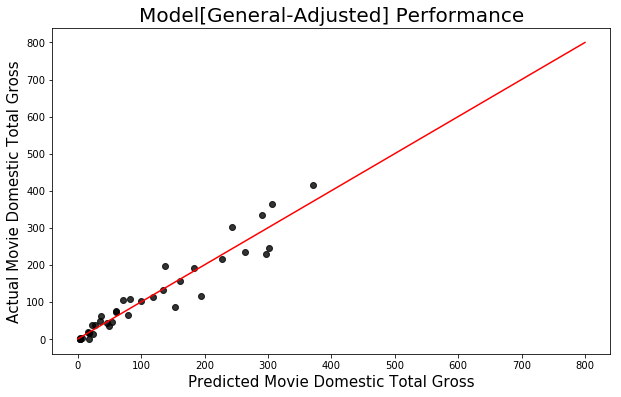

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(lasso_pred,Y_val,alpha=0.8,color='k')
plt.plot(np.linspace(0,800,1000),np.linspace(0,800,1000),color='r')
plt.xlabel('Predicted Movie Domestic Total Gross', fontsize=15)
plt.ylabel('Actual Movie Domestic Total Gross', fontsize=15)
plt.title('Model[General-Adjusted] Performance', fontsize=20)

plt.savefig('../../Images/model_general2 performance.png', dpi=200, bbox_inches = 'tight')

### Plotting Residuals

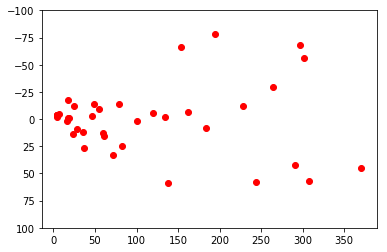

In [89]:
def residual_scatter(model, x, y, color):
    lasso_pred = model.predict(x)
    residual_ = []
    pred_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        pred_.append(pred)
    residual_scatter = plt.scatter(pred_, residual_, color = color)
    plt.ylim(100,-100)
#     return (residual_scatter, residual_hist) 
#         print("pred, resid:", str(pred) + ", $"+ str(resid))
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')
residual_scatter(best_lasso_I2, X_val, Y_val, 'r',)

NormaltestResult(statistic=2.9908905534466745, pvalue=0.2241487742743466)

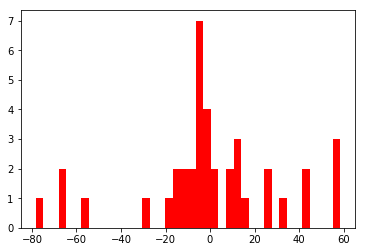

In [90]:
def residual_hist(model, x, y, color, outlier_value=260):
    lasso_pred = model.predict(x)
    residual_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        residual_ = [i for i in residual_ if abs(i) < outlier_value]
    residual_hist = plt.hist(residual_, color = color, bins=40)
    return normaltest(residual_)
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')

residual_hist(best_lasso_I2, X_val, Y_val, 'r', 260)

NormaltestResult(statistic=47.739588383173455, pvalue=4.3001152787327419e-11)

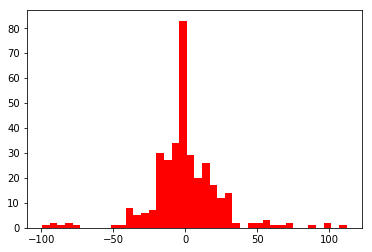

In [92]:
residual_hist(best_lasso_I2, x_train, Y_train, 'r', 240)

NormaltestResult(statistic=2.9908905534466745, pvalue=0.2241487742743466)

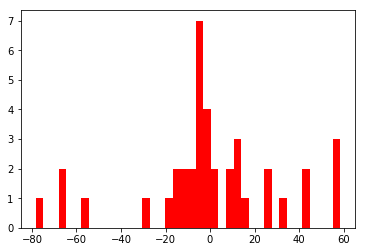

In [91]:
residual_hist(best_lasso_I2, X_val, Y_val, 'r', 80)


In [93]:
Y_val

46      37.446117
28       1.647083
97       0.111551
118      0.060818
64     191.452396
196     17.303424
41     245.439076
25     103.860290
199      2.266905
14      17.010170
22       0.009269
29     101.704370
12      35.088320
39       0.566006
21     107.518682
90      45.157105
65      65.014513
194    301.959197
188     63.150991
24      17.630465
50     228.778661
47     234.037575
17     364.001123
3      131.538435
23     333.176600
63     196.573705
58      72.679278
156     87.242834
8      415.004880
78       0.303877
18     114.053579
33     116.257848
106     12.227722
87     155.190832
48      76.233151
109     47.602194
96      42.779261
54     216.391482
142     36.665854
Name: DomesticTotalGross, dtype: float64

In [94]:
movies_df[movies_df['Movie Title']=='Fifty Shades Darker'].loc[:,'DomesticTotalGross']

37    114.43401
Name: DomesticTotalGross, dtype: float64

In [95]:
a = x_train[90]

In [96]:
best_lasso_I2.predict(a.reshape(1, -1))

array([ 53.9619365])

(array([ 94.,  52.,  46.,  39.,  18.,  24.,  17.,  16.,  12.,  11.,   8.,
         10.,   8.,   5.,   2.,   6.,   3.,   4.,   2.,   6.]),
 array([  1.18100000e-03,   2.12345243e+01,   4.24678676e+01,
          6.37012109e+01,   8.49345542e+01,   1.06167898e+02,
          1.27401241e+02,   1.48634584e+02,   1.69867927e+02,
          1.91101271e+02,   2.12334614e+02,   2.33567957e+02,
          2.54801301e+02,   2.76034644e+02,   2.97267987e+02,
          3.18501330e+02,   3.39734674e+02,   3.60968017e+02,
          3.82201360e+02,   4.03434704e+02,   4.24668047e+02]),
 <a list of 20 Patch objects>)

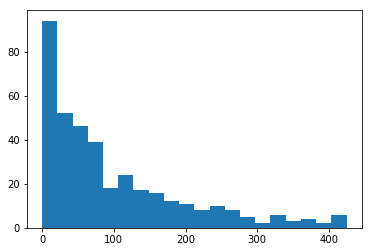

In [97]:
plt.hist(movies_df.DomesticTotalGross,bins=20)

### Model Results 

In [85]:
# adjusted r2

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

adj_r2(r2_score(Y_val,lasso_pred),X_tr.shape[0],X_tr.shape[1])

0.91282636647607607

In [86]:
# Standard Error of the Estimate

def standard_error_estimate(true,pred,num_data):
    sse = 0
    for y,ypred in zip(true,pred):
        sse += (y-ypred)**2
    return np.sqrt(sse/(num_data-2))

standard_error_estimate(Y_val,lasso_pred,X_tr.shape[0])

10.479429214794751

In [87]:
def test_model_results(true, X, pred):
    print("Mean Squared Error: ", mean_squared_error(true,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
    print("Mean Absolute Error: ",mean_absolute_error(true,pred))
    r2 = r2_score(true,pred)
    print("R2: ", r### Model Results 2)
    print("Adj R2: ", adj_r2(r2,X.shape[0],X.shape[1]))
    print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
          
test_model_results(Y_val, X_tr, lasso_pred)

Mean Squared Error:  963.023213857
Root Mean Squared Error:  31.0326153242
Mean Absolute Error:  21.4768974719
R2:  0.920959183598
Adj R2:  0.912826366476
Standard Error of Estimate:  10.4794292148
